In [5]:
#Import essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [6]:
df = pd.read_csv('/Users/ajithkhan/Downloads/energy_efficiency_data.csv')

#### Understanding the data 

In [7]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [8]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [11]:
df.Relative_Compactness.value_counts()

0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative_Compactness, dtype: int64

In [12]:
df.Surface_Area.value_counts()

514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface_Area, dtype: int64

##### Observations

1. This data is about the Heating and cooling load for a given building with their respective parameters
2. We can build a KNN regression model, predicting the Heating and cooling load 
3. The Heating and cooling load will be an independent variable and the remaining will be the dependent variable. 

In [13]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

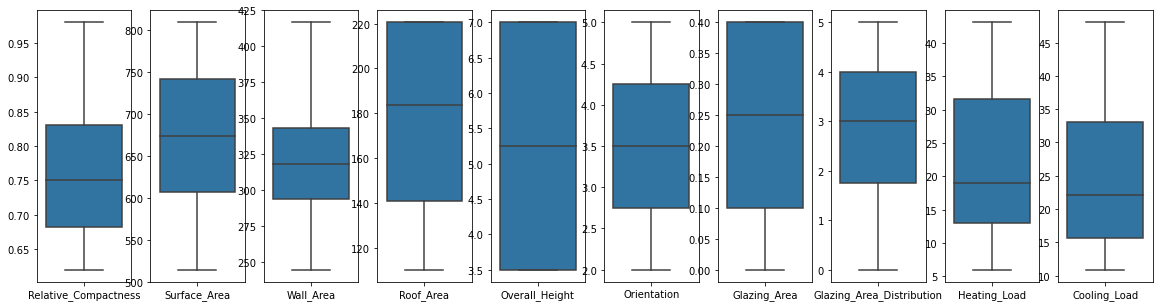

In [14]:
#Checking for any outliers 

fig,(axes) = plt.subplots(nrows=1, ncols=10, figsize=(20,5))
sns.boxplot(data = df[['Relative_Compactness']], ax = axes[0]);
sns.boxplot(data = df[['Surface_Area']], ax = axes[1]);
sns.boxplot(data = df[['Wall_Area']], ax = axes[2]);
sns.boxplot(data = df[['Roof_Area']], ax = axes[3]);
sns.boxplot(data = df[['Overall_Height']], ax = axes[4]);
sns.boxplot(data = df[['Orientation']], ax = axes[5]);
sns.boxplot(data = df[['Glazing_Area']], ax = axes[6]);
sns.boxplot(data = df[['Glazing_Area_Distribution']], ax = axes[7]);
sns.boxplot(data = df[['Heating_Load']], ax = axes[8]);
sns.boxplot(data = df[['Cooling_Load']], ax = axes[9]);


##### Observation
1. The dataset is very good and there are no significant outliers
2. Lets build a regression model. 

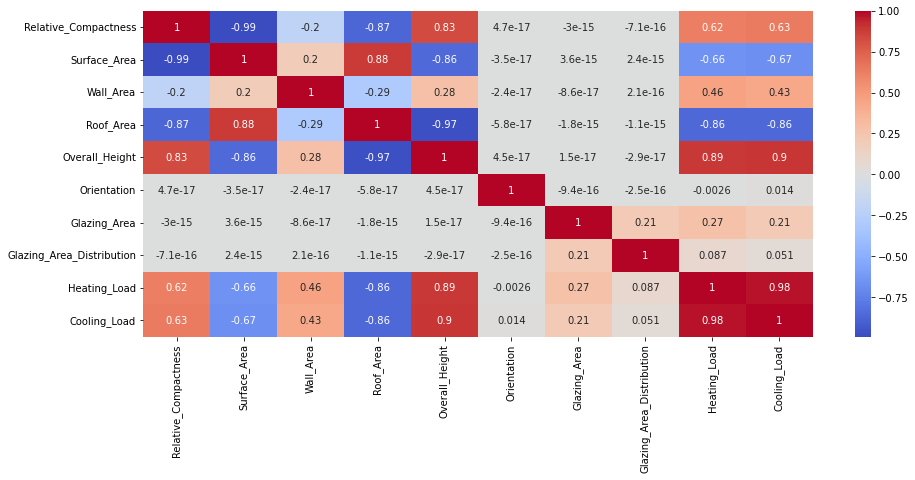

In [15]:
#Finding the co relations using heatmaps

df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

#### Observations

1. It is cleared that Overall_Height is the most significant independent variable in this dataset. 
2. Roof_area comes next and Surface_area comes later. 
3. Relative_Compactness is the least significant variable.
4. Relative_compactness and surface_Area were highly co-related and same goes to Overall_height and Roof_Area. 

#### Model building 
Lets try KNeighborsRegressor

In [55]:
#import packages 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [61]:
#Determinantion of X and y for Heating load
X_heat = df.drop(['Heating_Load', 'Cooling_Load'], axis =1)
y_heat = df['Heating_Load']

In [57]:
#Splitting of Data
Xtrain_heat, Xtest_heat, ytrain_heat, ytest_heat = train_test_split(X_heat,y_heat,test_size=0.2, random_state=4)

In [58]:
#Calling the model and fitting the data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xtrain_heat,ytrain_heat)

KNeighborsRegressor()

In [59]:
#Prediction 
ypred_heat = knn.predict(Xtest_heat)

In [60]:
#Accuracy score
metrics.r2_score(ytest_heat,ypred_heat)

0.9703802626466934

#### Conclusion
The Regressing model is 97.03% accurate to predict the Heating load.

In [71]:
#Determinantion of X and y for Heating load
X_cool = df.drop(['Heating_Load', 'Cooling_Load'], axis =1)
y_cool = df['Cooling_Load']

In [72]:
#Splitting of Data
Xtrain_cool, Xtest_cool, ytrain_cool, ytest_cool = train_test_split(X_cool,y_cool,test_size=0.2, random_state=4)

In [73]:
#Calling the model and fitting the data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xtrain_cool,ytrain_cool)

KNeighborsRegressor()

In [74]:
#Prediction 
ypred_cool = knn.predict(Xtest_cool)

In [75]:
#Accuracy score
metrics.r2_score(ytest_cool,ypred_cool)

0.9651040210503622